# Downloading data

In [11]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
import kagglehub
import os 

if not os.path.exists("./data"):
    os.makedirs("./data")

# Download latest version
path = kagglehub.dataset_download("jaafaryassine/painter-by-numbers")

print("Path to dataset files:", path)

100%|██████████| 2.24G/2.24G [01:14<00:00, 32.1MB/s]

Extracting model files...


Path to dataset files: /home/work/.cache/kagglehub/datasets/jaafaryassine/painter-by-numbers/versions/1


In [14]:
!mv {path}/* './data'

# Data load by pandas dataframe

In [1]:
import pandas as pd
import numpy as np
csv_file='./data/imagesinfo.csv'

data=pd.read_csv(csv_file)

/opt/conda/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,836.jpg
...,...,...,...,...,...,...,...,...,...,...
103245,Jackson Pollock,1948.0,abstract,682.0,220.0,96405.0,wikiart,Action painting,Number 13A (Arabesque),25525.jpg
103246,Bernardo Strozzi,NaN,religious painting,329.0,456.0,127594.0,wikiart,Baroque,St. Francis of Assisi,47038.jpg
103247,Josef Sima,NaN,landscape,293.0,512.0,102519.0,wikiart,Surrealism,Maisons à la campagne II,7680.jpg
103248,Brett Whiteley,1982.0,marina,293.0,512.0,167423.0,wikiart,NaN,Thebe's Revenge,9021.jpg


In [2]:
image_path='./data/images/'+data['filename'].values
artist_name=data['artist'].values
style_name=data['style'].values

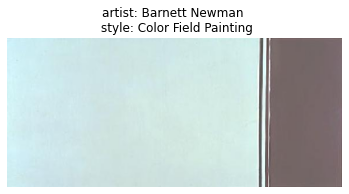

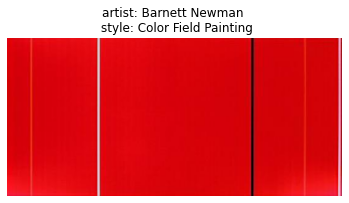

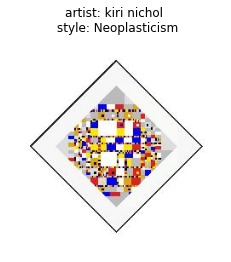

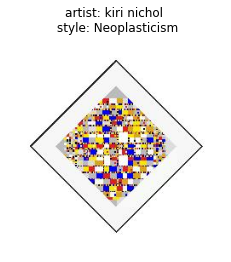

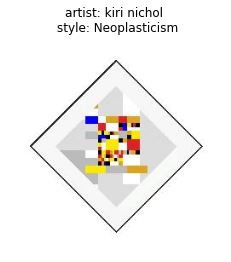

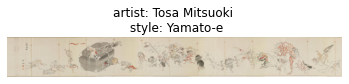

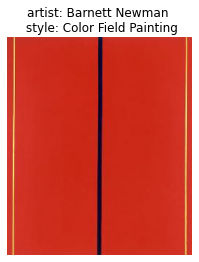

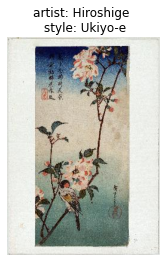

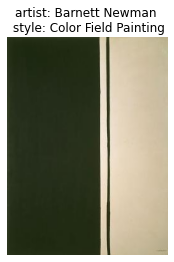

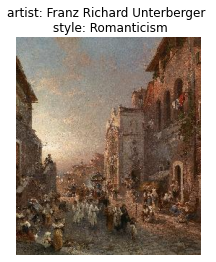

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(10):
    plt.title(f"artist: {artist_name[i]} \n style: {style_name[i]}")
    plt.imshow(mpimg.imread(image_path[i]))
    plt.axis('off')
    plt.show()

# Image into Loading dataset

In [20]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
from PIL import Image


transform=transforms.Compose([
    transforms.Resize((256,256)),
    # transforms.ToTensor(),
    transforms.Lambda(lambda x: x/ 255.0),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
import torch
from PIL import Image
import torchvision.io as io

# Load all images and convert to tensors
for i in range(len(image_path[:100])):
    img_tmp = io.read_image(image_path[i])
    # Apply the transform to the image
    img_tmp = transform(img_tmp)
    img_all=torch.cat((img_all, img_tmp.unsqueeze(0)), 0) if i > 0 else img_tmp.unsqueeze(0)


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(img_all, style_name[:100], test_size=0.2, random_state=42)
# Convert the labels to tensors
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [23]:
y_train

array(['Symbolism', 'Art Nouveau (Modern)', 'Biedermeier', 'Rococo',
       'Pointillism', 'Cloisonnism', 'Cubism', 'Impressionism',
       'Romanticism', nan, 'Surrealism', 'Fauvism',
       'Art Nouveau (Modern)', 'Romanticism', 'Art Nouveau (Modern)',
       'Yamato-e', 'Romanticism', 'Pointillism', 'Northern Renaissance',
       'Ukiyo-e', 'Ukiyo-e', 'Romanticism', 'Ukiyo-e', nan, 'Symbolism',
       'Ukiyo-e', nan, 'Romanticism', 'Color Field Painting', 'Ukiyo-e',
       'Realism', 'Neoplasticism', 'Ukiyo-e', 'Baroque',
       'Color Field Painting', 'Realism', 'Color Field Painting',
       'Color Field Painting', 'Cubism', 'Art Nouveau (Modern)', nan,
       'Symbolism', 'Symbolism', 'Cubism', 'Ukiyo-e', 'Baroque', 'Cubism',
       'Classicism', 'Magic Realism', 'Art Nouveau (Modern)',
       'Mannerism (Late Renaissance)', 'Pointillism', 'Neoplasticism',
       'Northern Renaissance', 'Symbolism', 'Neoplasticism',
       'Art Nouveau (Modern)', 'Baroque', 'Art Nouveau (Modern)'